In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

rsna-intracranial-hemorrhage-detection
rsnashaansub3
sub-rsna-2
submissions-rsna



In [2]:
sub_path = "../input/sub-rsna-2"
all_files = os.listdir(sub_path)
sub_path2 = "../input/submissions-rsna"
all_files2 = os.listdir(sub_path2)
sub_path3 = "../input/rsnashaansub3"
all_files3 = os.listdir(sub_path3)

In [3]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
outs2 = [pd.read_csv(os.path.join(sub_path2, f), index_col=0) for f in all_files2]
outs3 = [pd.read_csv(os.path.join(sub_path3, f), index_col=0) for f in all_files3]

outs.append(outs2)
outs.append(outs3)
# output list 
output = [] 
# function used for removing nested  
# lists in python.  
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            output.append(i)
reemovNestings(outs)
concat_sub = pd.concat(output, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [4]:
concat_sub

,ID,mol0,mol1,mol2,mol3,mol4,mol5
0,ID_000012eaf_any,0.052621,0.016250,0.145175,0.014969,0.016327,0.049611
1,ID_000012eaf_epidural,0.000915,0.000593,0.002098,0.000951,0.000666,0.001499
2,ID_000012eaf_intraparenchymal,0.005284,0.001376,0.054287,0.003436,0.003197,0.012591
3,ID_000012eaf_intraventricular,0.062729,0.000326,0.032220,0.001199,0.001025,0.006229
4,ID_000012eaf_subarachnoid,0.006326,0.001489,0.029016,0.002270,0.002342,0.004165
...,...,...,...,...,...,...,...
471265,ID_ffffcbff8_epidural,0.000226,0.000081,0.000270,0.000535,0.000130,0.000264
471266,ID_ffffcbff8_intraparenchymal,0.004115,0.000809,0.000773,0.001719,0.001579,0.001028
471267,ID_ffffcbff8_intraventricular,0.087569,0.000634,0.003804,0.009227,0.005376,0.000282
471268,ID_ffffcbff8_subarachnoid,0.006137,0.002167,0.001402,0.004365,0.002800,0.001611


In [5]:
# check correlation
concat_sub.iloc[:,1:].corr()

,mol0,mol1,mol2,mol3,mol4,mol5
mol0,1.000000,0.935955,0.936585,0.946013,0.926470,0.931218
mol1,0.935955,1.000000,0.945247,0.944629,0.935681,0.947388
mol2,0.936585,0.945247,1.000000,0.931533,0.941782,0.960594
mol3,0.946013,0.944629,0.931533,1.000000,0.918634,0.930137
mol4,0.926470,0.935681,0.941782,0.918634,1.000000,0.945143
mol5,0.931218,0.947388,0.960594,0.930137,0.945143,1.000000


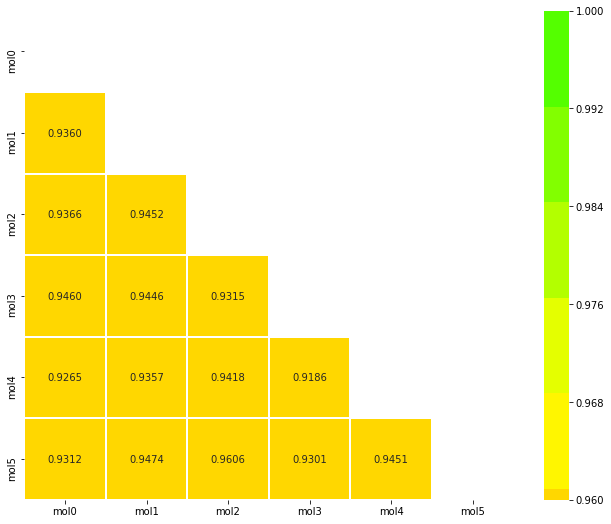

In [6]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [7]:
# concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)
# concat_sub['m_mean'] = concat_sub.iloc[:, 1:5].mean(axis=1)

In [8]:
# concat_sub

In [9]:
# concat_sub['Label'] = concat_sub['m_median']
# concat_sub[['ID', 'Label']].to_csv('stack_median.csv', 
#                                         index=False, float_format='%.6f')

In [10]:
# concat_sub['Label'] = concat_sub['m_mean']
# concat_sub[['ID', 'Label']].to_csv('stack_mean.csv', 
#                                         index=False, float_format='%.6f')

In [11]:
all_files+all_files2+all_files3

['eff_b0_submission.csv',
 'submission_two_ch_inception_v3_ep5.csv',
 'fastai-effb0-224-3channel-dicom-0.025delete.csv',
 'submission_new.csv',
 'fastai-effb0-224-3channel-dicom-0.025delete-validgrouped-stage1.csv',
 'fastai-effb2-410-3channel-dicom-0.025delete-validgrouped-stage1.csv']

In [12]:
concat_sub['Label'] = concat_sub['mol0']*0 + concat_sub['mol1']*0.1 + concat_sub['mol2']*0.2 + concat_sub['mol3']*0 + concat_sub['mol4']*0.3 + concat_sub['mol5']*0.4
concat_sub[['ID', 'Label']].to_csv('weighted_average2.csv', 
                                        index=False, float_format='%.6f')

In [13]:
concat_sub

,ID,mol0,mol1,mol2,mol3,mol4,mol5,Label
0,ID_000012eaf_any,0.052621,0.016250,0.145175,0.014969,0.016327,0.049611,0.055402
1,ID_000012eaf_epidural,0.000915,0.000593,0.002098,0.000951,0.000666,0.001499,0.001278
2,ID_000012eaf_intraparenchymal,0.005284,0.001376,0.054287,0.003436,0.003197,0.012591,0.016990
3,ID_000012eaf_intraventricular,0.062729,0.000326,0.032220,0.001199,0.001025,0.006229,0.009276
4,ID_000012eaf_subarachnoid,0.006326,0.001489,0.029016,0.002270,0.002342,0.004165,0.008321
...,...,...,...,...,...,...,...,...
471265,ID_ffffcbff8_epidural,0.000226,0.000081,0.000270,0.000535,0.000130,0.000264,0.000207
471266,ID_ffffcbff8_intraparenchymal,0.004115,0.000809,0.000773,0.001719,0.001579,0.001028,0.001120
471267,ID_ffffcbff8_intraventricular,0.087569,0.000634,0.003804,0.009227,0.005376,0.000282,0.002550
471268,ID_ffffcbff8_subarachnoid,0.006137,0.002167,0.001402,0.004365,0.002800,0.001611,0.001981
